# **Working with Dates and Times**  
---


### Importing `pandas`

In [ ]:
import pandas as pd

### Converting with `pd.to_datetime(arg)`  


#### Specifying date formats with the `format = ` parameter
> Could be useful when parsing dates with awkward date formats  
+ More information can be found in the documentatio linked [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [ ]:
# Assume we receive a date in this format: 10/11/12. How can we specify the format?
pd.to_datetime("10/11/12", format="%d/%m/%y")

Timestamp('2012-11-10 00:00:00')

In [ ]:
#"Dec 11 2019 Meeting"
pd.to_datetime("Dec 11 2019 Meeting", format="%b %d %Y Meeting")

Timestamp('2019-12-11 00:00:00')

#### Parsing a DataFrame's column using `pd.to_datetime()` **after** importing


In [ ]:
dummy = pd.read_csv("/content/nuforc_reports.csv")

#The date_time column is an object, yet it should contain dates
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         88094 non-null  object 
 1   city            87890 non-null  object 
 2   state           82889 non-null  object 
 3   date_time       86937 non-null  object 
 4   shape           85626 non-null  object 
 5   duration        84953 non-null  object 
 6   stats           88087 non-null  object 
 7   report_link     88124 non-null  object 
 8   text            88069 non-null  object 
 9   posted          86937 non-null  object 
 10  city_latitude   72012 non-null  float64
 11  city_longitude  72012 non-null  float64
dtypes: float64(2), object(10)
memory usage: 8.1+ MB


In [ ]:
# calling .to_datetime() on the date_time column: returns a series of datetime
pd.to_datetime(dummy["date_time"])

0       2019-12-12 18:43:00
1       2019-03-22 18:30:00
2                       NaT
3       2019-04-17 02:00:00
4       2009-03-15 18:00:00
                ...        
88119   2019-10-02 20:00:00
88120   2019-10-02 20:00:00
88121   2019-10-02 20:03:00
88122   2019-10-02 22:00:00
88123   2019-10-02 22:00:00
Name: date_time, Length: 88124, dtype: datetime64[ns]

In [ ]:
# The series returned can be used to overwrite the original date_time column like this:
dummy["date_time"] = pd.to_datetime(dummy["date_time"])

# Now the dtype of the date_time format should be datetime64[ns]
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88094 non-null  object        
 1   city            87890 non-null  object        
 2   state           82889 non-null  object        
 3   date_time       86937 non-null  datetime64[ns]
 4   shape           85626 non-null  object        
 5   duration        84953 non-null  object        
 6   stats           88087 non-null  object        
 7   report_link     88124 non-null  object        
 8   text            88069 non-null  object        
 9   posted          86937 non-null  object        
 10  city_latitude   72012 non-null  float64       
 11  city_longitude  72012 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


### Parsing a column as date right from `read_csv()`
> The `parse_dates =` parameter is supplied with a `list` of column names that we want to parse into date

In [ ]:
ufos = pd.read_csv("/content/nuforc_reports.csv", parse_dates=["date_time"])

# Having a look at the Dataframe's structure, and date_time should be a datetime
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88094 non-null  object        
 1   city            87890 non-null  object        
 2   state           82889 non-null  object        
 3   date_time       86937 non-null  datetime64[ns]
 4   shape           85626 non-null  object        
 5   duration        84953 non-null  object        
 6   stats           88087 non-null  object        
 7   report_link     88124 non-null  object        
 8   text            88069 non-null  object        
 9   posted          86937 non-null  object        
 10  city_latitude   72012 non-null  float64       
 11  city_longitude  72012 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


### Important `datetime` properties  
> Each `datetime` value has a number of properties that we can access, by selecting that column and adding `.dt` after the `datetime` `Series` like so: `df["date_time_column"].dt`  
>> More information on time / date can be found [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components)

In [ ]:
# Taking a look at the Series:
ufos["date_time"]

0       2019-12-12 18:43:00
1       2019-03-22 18:30:00
2                       NaT
3       2019-04-17 02:00:00
4       2009-03-15 18:00:00
                ...        
88119   2019-10-02 20:00:00
88120   2019-10-02 20:00:00
88121   2019-10-02 20:03:00
88122   2019-10-02 22:00:00
88123   2019-10-02 22:00:00
Name: date_time, Length: 88124, dtype: datetime64[ns]

In [ ]:
# Appending .dt to the Series: (it's a DatetimeProperties Object)
ufos["date_time"].dt

In [ ]:
# Inside of dt, we have lots of properties such as year, hour, date, e.t.c
ufos["date_time"].dt.year

0        2019.0
1        2019.0
2           NaN
3        2019.0
4        2009.0
          ...  
88119    2019.0
88120    2019.0
88121    2019.0
88122    2019.0
88123    2019.0
Name: date_time, Length: 88124, dtype: float64

<Axes: xlabel='Year', ylabel='No. of Sightings'>

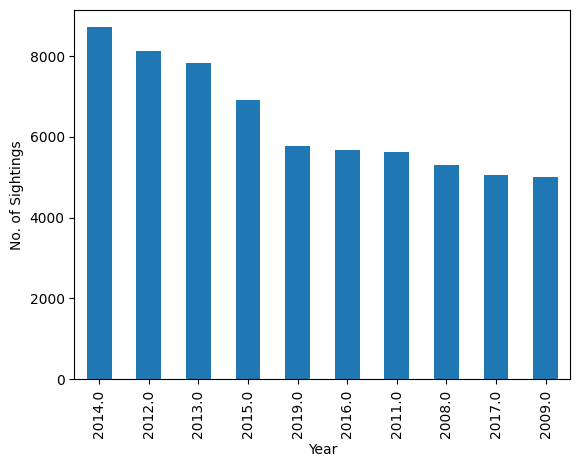

In [ ]:
# Plot the top 10 years with most UFO sightings recorded
ufos["date_time"].dt.year.value_counts().head(10).plot(kind="bar", xlabel="Year", ylabel="No. of Sightings")

In [ ]:
# Is there a particular month with more UFO sightings?
ufos["date_time"].dt.month.value_counts()

7.0     10682
8.0      8996
9.0      8498
10.0     8371
6.0      8357
11.0     7596
12.0     6525
5.0      6063
1.0      5979
4.0      5817
3.0      5494
2.0      4559
Name: date_time, dtype: int64

<Axes: xlabel='Hour of Day', ylabel='No. of Sightings'>

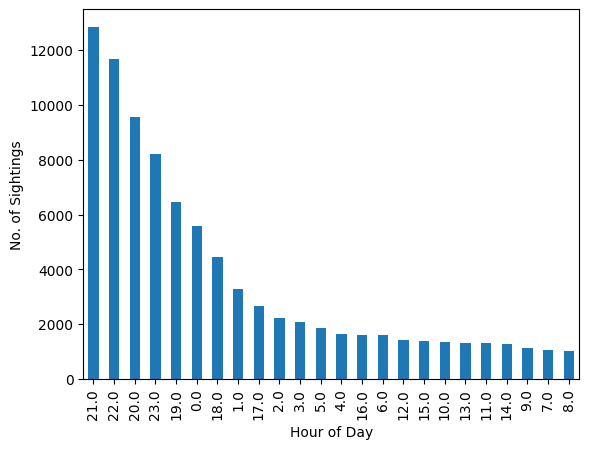

In [ ]:
# What hour of the day do most UFO sightings occur and how does that show on a graph?
ufos["date_time"].dt.hour.value_counts().plot(kind="bar", xlabel="Hour of Day", ylabel="No. of Sightings")

In [ ]:
# How about UFO sightings for day of the week?
# NOTE: Day 0 = Monday, Day 6 = Sunday
ufos["date_time"].dt.dayofweek.value_counts()

5.0    16304
4.0    12864
6.0    12652
3.0    11729
2.0    11646
1.0    10987
0.0    10755
Name: date_time, dtype: int64

### Comparing Dates  
> Comparison operators can be used, such as `>`, `<`, `>=`, `<=`, `==`
+ Methods such as `.between()` as well

In [ ]:
# Filter by UFO sightings reported before 1960?
ufos[ufos["date_time"].dt.year < 1980].shape
# 1,499 Entries

(1499, 12)

In [ ]:
# UFO sightings between 1988 & 1989
ufos[ufos["date_time"].dt.year.between(1988, 1989, inclusive="both")].sort_values("date_time", ascending=True)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
4128,fast moving Triangle with no sound and orange ...,Roselle,IL,1988-01-01 03:00:00,triangle,2-3 min,Occurred : 1/1/1988 03:00 (Entered as : jan 1...,http://www.nuforc.org/webreports/052/S52855.html,fast moving Triangle with no sound and orange ...,2006-10-30T00:00:00,41.979200,-88.089500
8389,"Gigantic circular object hovering, and then wi...",Kenner,LA,1988-01-01 17:00:00,circle,20 minutes,Occurred : 1/1/1988 17:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/062/S62422.html,"Gigantic circular object hovering, and then wi...",2008-03-31T00:00:00,30.017503,-90.251064
2071,Broad daylight gold colored flying object abou...,New Britain Twp,PA,1988-01-03 13:00:00,oval,15 minutes,Occurred : 1/3/1988 13:00 (Entered as : 01/03...,http://www.nuforc.org/webreports/147/S147265.html,Broad daylight gold colored flying object abou...,2019-07-05T00:00:00,NaN,NaN
33511,"A dull yellow light, low off the ground and no...",Williamsfield,IL,1988-01-10 22:10:00,unknown,27 minutes,Occurred : 1/10/1988 22:10 (Entered as : 01/1...,http://www.nuforc.org/webreports/082/S82609.html,"A dull yellow light, low off the ground and no...",2011-08-07T00:00:00,40.934800,-90.025900
16295,"8 gliding craft in formation with a 9th ""quant...",Cambridge,MA,1988-01-12 03:30:00,oval,15 seconds,Occurred : 1/12/1988 03:30 (Entered as : 1/12...,http://www.nuforc.org/webreports/066/S66040.html,"8 gliding craft in formation with a 9th ""quant...",2008-10-31T00:00:00,42.366795,-71.095464
...,...,...,...,...,...,...,...,...,...,...,...,...
8540,"rectangular, black metallic, hover, silent, hu...",Pineville,LA,1989-12-13 23:00:00,rectangle,5 Minutes?,Occurred : 12/13/1989 23:00 (Entered as : 12/...,http://www.nuforc.org/webreports/062/S62246.html,"rectangular, black metallic, hover, silent, hu...",2008-03-31T00:00:00,31.290950,-92.391473
8307,A brightly lit perfectly round sphere floated ...,Glennwood,OR,1989-12-15 18:00:00,sphere,1 Minute,Occurred : 12/15/1989 18:00 (Entered as : 12/...,http://www.nuforc.org/webreports/056/S56511.html,A brightly lit perfectly round sphere floated ...,2007-06-12T00:00:00,NaN,NaN
15542,bright lite making fast moves and complex,Cicero,NY,1989-12-22 03:00:00,light,5 minutes,Occurred : 12/22/1989 03:00 (Entered as : 12/...,http://www.nuforc.org/webreports/073/S73929.html,bright lite making fast moves and complex I ...,2010-02-14T00:00:00,43.166900,-76.055800
37356,"UFO Santiage, Chile 1989",Santiago (Chile),NaN,1989-12-24 01:00:00,light,20 mins,Occurred : 12/24/1989 01:00 (Entered as : 12/...,http://www.nuforc.org/webreports/088/S88604.html,"UFO Santiage, Chile 1989 At first the object a...",2012-05-13T00:00:00,NaN,NaN


In [ ]:
# UFO sightings on / after 22 Dec 2019
ufos[ufos["date_time"] >= "22 Dec 2019"].index.size

51

### Finding StarLink Flybys in the UFO Dataset  
> The StarLink Flybys were evident after `22 Dec 2019`

In [ ]:
# First, filter out sightings after 2018
recent_sightings = ufos[ufos["date_time"].dt.year >= 2018]
recent_sightings["date_time"].dt.date.value_counts()

2019-11-11    77
2019-05-25    69
2019-05-26    67
2019-05-24    60
2019-07-04    57
              ..
2019-12-29     1
2018-02-08     1
2019-05-09     1
2018-02-04     1
2018-02-07     1
Name: date_time, Length: 719, dtype: int64

In [ ]:
recent_sightings[recent_sightings["date_time"].between("2019-05-24", "2019-05-25", inclusive="both")]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
1913,Were looking up at the stars and a string of w...,Fort Yates,ND,2019-05-24 00:00:00,unknown,3 minutes,Occurred : 5/24/2019 00:00 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146348.html,We were sitting outside looking up at the star...,2019-06-07T00:00:00,46.103500,-100.702900
1914,May 24th at approximately 0002 hours I witness...,Wilsonville,OR,2019-05-24 00:02:00,formation,2 minutes,Occurred : 5/24/2019 00:02 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146271.html,"May 24th, at approximately 0002 hours, I witne...",2019-06-07T00:00:00,45.308400,-122.779900
1915,30 white orbs. ((NUFORC Note: Satellites fro...,Mitchell,SD,2019-05-24 00:05:00,formation,1 minute,Occurred : 5/24/2019 00:05 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146355.html,"30 white orbs. On the Evening of May 24th, 201...",2019-06-07T00:00:00,43.718300,-98.026200
1916,seen a rip in the night sky.it looks like a br...,Hazel green,AL,2019-05-24 00:14:00,light,2 minutes,Occurred : 5/24/2019 00:14 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146455.html,seen a rip in the night sky.it looks like a bi...,2019-06-07T00:00:00,34.934100,-86.580300
1917,It was somewhat a slow moving blurry light obj...,Staunton,VA,2019-05-24 00:16:00,chevron,1+ minutes,Occurred : 5/24/2019 00:16 (Entered as : 5/24...,http://www.nuforc.org/webreports/146/S146265.html,This is what I saw. At west side Staunton cit...,2019-06-07T00:00:00,38.137038,-79.063041
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,Cluster of stars headed northbound silence in ...,Camp Verde,AZ,2019-05-25 00:00:00,light,A few minutes,Occurred : 5/25/2019 00:00 (Entered as : 5/25...,http://www.nuforc.org/webreports/146/S146304.html,"sighting last night camp Verde, Arizona, by ar...",2019-06-07T00:00:00,34.486200,-111.780800
2168,It was a line of light in the sky. ((NUFORC N...,Aurora,KY,2019-05-25 00:00:00,light,2 minutes,Occurred : 5/25/2019 00:00 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146340.html,My friends and I were on a boat on Kentucky La...,2019-06-07T00:00:00,NaN,NaN
2169,Sstrait string of lights 10 or more With two c...,Otsego,MN,2019-05-25 00:00:00,formation,2 minutes,Occurred : 5/25/2019 00:00 (Entered as : 5-25...,http://www.nuforc.org/webreports/146/S146349.html,At approximately 12:10 a strait string of ligh...,2019-06-07T00:00:00,NaN,NaN
2376,We saw an UFO drop down from sky and hu Hover ...,Kahului,HI,2019-05-24 06:30:00,unknown,10 minutes,Occurred : 5/24/2019 06:30 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146722.html,We saw an UFO drop down from sky and hu Hover ...,2019-06-20T00:00:00,20.880451,-156.469046


### Date Math and `Timedelta`  
> Difference between Dates, for instance, can be calculated

In [ ]:
# First, convert the "posted" column in the UFO dataset to a datetime
ufos["posted"] = pd.to_datetime(ufos["posted"])
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88094 non-null  object        
 1   city            87890 non-null  object        
 2   state           82889 non-null  object        
 3   date_time       86937 non-null  datetime64[ns]
 4   shape           85626 non-null  object        
 5   duration        84953 non-null  object        
 6   stats           88087 non-null  object        
 7   report_link     88124 non-null  object        
 8   text            88069 non-null  object        
 9   posted          86937 non-null  datetime64[ns]
 10  city_latitude   72012 non-null  float64       
 11  city_longitude  72012 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.1+ MB


#### Finding the Difference between `posted` and `date_time` columns in the `nuforc_reports.csv` dataset (`Timedelta`)  
> Note, that:  
+ `posted` colum represents the date on which the sighting was **posted to the website**
+ `date_time` column represents the date on which the sighting was **observed**
+ Components within a `Series` containing `Timedelta` values can be accessed by appending `.dt` after selecting the column
>> More information on `Timedelta` can be found [here](https://pandas.pydata.org/docs/user_guide/timedeltas.html#attributes)

In [ ]:
# Finding the difference
ufos["posted"] - ufos["date_time"]

# !NOTE, the result is a TIMEDELTA datatype!

0          9 days 05:17:00
1          6 days 05:30:00
2                      NaT
3          0 days 22:00:00
4       3685 days 06:00:00
               ...        
88119      1 days 04:00:00
88120      1 days 04:00:00
88121      1 days 03:57:00
88122      1 days 02:00:00
88123      1 days 02:00:00
Length: 88124, dtype: timedelta64[ns]

In [ ]:
# Adding the time-delta computation as a new column in the ufos DataFrame
ufos["time_before_reporting"] = ufos["posted"] - ufos["date_time"]

In [ ]:
# Check to see that the new column added is of type: timedelta
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   summary                88094 non-null  object         
 1   city                   87890 non-null  object         
 2   state                  82889 non-null  object         
 3   date_time              86937 non-null  datetime64[ns] 
 4   shape                  85626 non-null  object         
 5   duration               84953 non-null  object         
 6   stats                  88087 non-null  object         
 7   report_link            88124 non-null  object         
 8   text                   88069 non-null  object         
 9   posted                 86937 non-null  datetime64[ns] 
 10  city_latitude          72012 non-null  float64        
 11  city_longitude         72012 non-null  float64        
 12  time_before_reporting  86937 non-null  timedel

In [ ]:
# For instance, Getting the Difference in days out of the time_before_reporting column:
ufos["time_before_reporting"].dt.days

0           9.0
1           6.0
2           NaN
3           0.0
4        3685.0
          ...  
88119       1.0
88120       1.0
88121       1.0
88122       1.0
88123       1.0
Name: time_before_reporting, Length: 88124, dtype: float64

### Working with the `billboard_charts.csv` dataset

#### Importing the DataSet and parsing the date column

In [ ]:
import pandas as pd

# Parse the dataset
charts = pd.read_csv("/content/billboard_charts.csv", parse_dates=["date"])

# A little peek into the dataset:
charts.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


#### Which `artist` has been on the charts the most number of times?

In [ ]:
# charts["artist"].mode()
charts["artist"].value_counts().head(1)
# Taylor Swift!!!

Taylor Swift    1023
Name: artist, dtype: int64

#### Plot the top 10 most prolific artists

<Axes: title={'center': "Artists' Top 100 Billboard Appearances"}, xlabel='Artist', ylabel='Top 100 Appearances'>

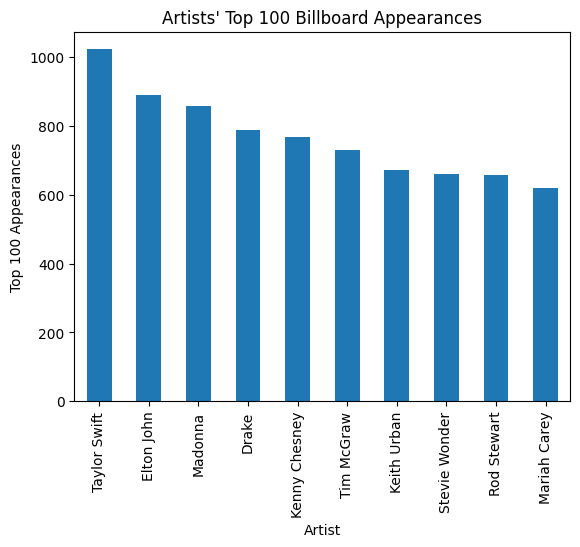

In [ ]:
charts["artist"].value_counts().head(10).plot(kind="bar", xlabel="Artist", ylabel="Top 100 Appearances", title="Artists' Top 100 Billboard Appearances")

#### Which `artist` spent most time as `rank` 1 on the charts?

In [ ]:
charts[charts['rank']==1]["artist"].value_counts()

Mariah Carey       65
The Beatles        54
Boyz II Men        34
Madonna            32
Whitney Houston    31
                   ..
Nick Gilder         1
Anne Murray         1
Nelly Furtado       1
Amii Stewart        1
The Elegants        1
Name: artist, Length: 749, dtype: int64

<Axes: title={'center': 'No. 1 Hits in Billboard Top 100'}, xlabel='Artist', ylabel='No. 1 Hits'>

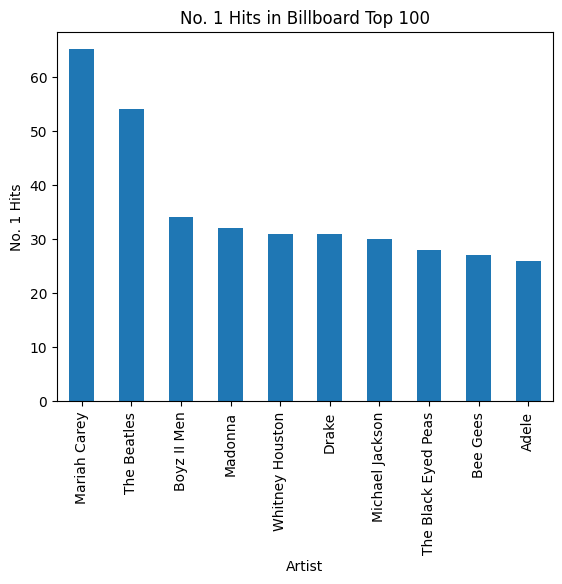

In [ ]:
# Plot top 10 number 1 hits
charts[charts["rank"]==1]["artist"].value_counts().head(10).plot(kind="bar",  xlabel="Artist", ylabel="No. 1 Hits", title="No. 1 Hits in Billboard Top 100")

#### What `song` was ranked no. 1 for the most number of weeks?

In [ ]:
charts[charts["rank"]==1]["song"].value_counts()

Old Town Road                               19
Despacito                                   16
One Sweet Day                               16
Rockstar                                    15
I'll Make Love To You                       14
                                            ..
Then Came You                                1
You Haven't Done Nothin                      1
You Ain't Seen Nothing Yet/Free Wheelin'     1
Whatever Gets You Thru The Night             1
I'll Take You There                          1
Name: song, Length: 1104, dtype: int64

#### Plot the trend of the the song that has spent most time as no. 1

In [ ]:
# Sort by date first
charts[charts["song"]=="Old Town Road"].sort_values("date")

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
13882,2019-03-16,83,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,NaN,83,1
13750,2019-03-23,51,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,83.0,51,2
13631,2019-03-30,32,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,51.0,32,3
13514,2019-04-06,15,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,32.0,15,4
13400,2019-04-13,1,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,15.0,1,5
13300,2019-04-20,1,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,1.0,1,6
13200,2019-04-27,1,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,1.0,1,7
13100,2019-05-04,1,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,1.0,1,8
13000,2019-05-11,1,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,1.0,1,9
12900,2019-05-18,1,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,1.0,1,10


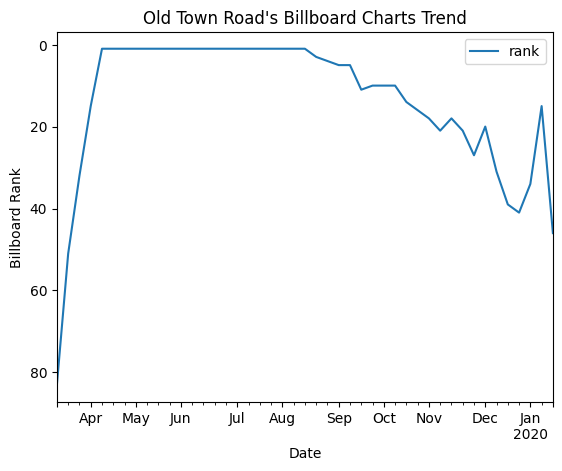

In [ ]:
# Plot that
charts[charts["song"]=="Old Town Road"].sort_values(["date"]).plot(kind="line", x="date", y="rank", xlabel="Date", ylabel="Billboard Rank", title="Old Town Road's Billboard Charts Trend").invert_yaxis()

# **Exercise Time!** 💪 💪 💪
---
**Work with the `kc_house_data.csv` dataset to answer the following questions:**

##### Import the `kc_house_data.csv` Dataset and parse the `date` column in a single line

In [ ]:
houses = pd.read_csv("/content/kc_house_data.csv", parse_dates=["date"])
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

##### Calculate how many days the dataset spans

In [ ]:
# Sort the values by date beginning with earliest, and subtract first date from last date
houses.sort_values(["date"])["date"].iloc[-1] - houses.sort_values(["date"])["date"].iloc[0]
# Same as: houses["date"].max() - houses["date"].min()

Timedelta('390 days 00:00:00')

##### Find the date that had the most house sales
>Find all the homes sold on that date

In [ ]:
# Finding the date
# Same as: houses["date"].mode()[0]
houses["date"].value_counts().head(1)

2014-06-23    142
Name: date, dtype: int64

In [ ]:
# Houses sold on that date
houses[houses["date"] == houses["date"].mode()[0]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
117,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,...,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780
397,5175800060,2014-06-23,365000.0,4,2.00,1940,25600,1.0,0,0,...,8,1940,0,1962,0,98006,47.5722,-122.129,2000,10071
470,2172000075,2014-06-23,290900.0,2,2.00,1610,17600,2.0,0,0,...,6,1610,0,1930,1983,98178,47.4855,-122.266,1310,12950
621,3010300240,2014-06-23,577000.0,3,2.50,2060,5750,1.0,0,0,...,7,1330,730,1976,0,98116,47.5671,-122.391,1920,5750
676,7846700310,2014-06-23,280000.0,2,1.00,1010,3000,1.0,0,0,...,7,1010,0,1925,0,98045,47.4965,-121.785,1150,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21230,3629990280,2014-06-23,497000.0,3,2.25,1630,3817,2.0,0,0,...,7,1630,0,2005,0,98029,47.5485,-121.999,1630,3348
21479,6181500120,2014-06-23,312891.0,5,3.00,2300,8214,2.0,0,0,...,8,2300,0,2013,0,98001,47.3052,-122.276,2594,4950
21529,2487200490,2014-06-23,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
21578,567000385,2014-06-23,362500.0,2,1.50,940,1768,2.0,0,0,...,7,940,0,2009,0,98144,47.5925,-122.295,1130,1159


##### Create a pie chart showing the years that home sales took place in (2014 and 2015)

In [ ]:
# Number of home sales per year
houses["date"].dt.year.value_counts()

2014    14633
2015     6980
Name: date, dtype: int64

<Axes: ylabel='date'>

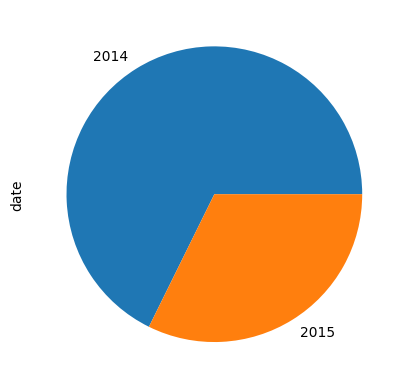

In [ ]:
# Plotting the number on a pie chart
houses["date"].dt.year.value_counts().plot(kind="pie",)

##### Find all the homes sold in 2014, sorted from earliest to latest

In [ ]:
# 2014 home sales
houses[houses["date"].dt.year == 2014].sort_values("date", ascending=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11907,3221059036,2014-05-02,400000.0,4,2.50,3630,42884,1.5,0,0,...,9,2300,1330,1979,0,98092,47.2617,-122.190,2830,80148
20559,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
17038,2326059099,2014-05-02,838000.0,4,2.50,3310,42998,2.0,0,0,...,9,3310,0,2001,0,98052,47.7232,-122.131,3350,42847
15921,7831800460,2014-05-02,235000.0,2,1.00,1210,9400,1.0,0,0,...,6,1210,0,1949,0,98106,47.5342,-122.360,1580,6026
11891,7305300695,2014-05-02,625000.0,4,2.50,2820,8408,2.0,0,0,...,9,2820,0,2014,0,98155,47.7538,-122.325,1300,8408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,7701990700,2014-12-31,825000.0,4,2.50,3210,18901,2.0,0,0,...,10,3210,0,1993,0,98077,47.7090,-122.073,3330,18901
8393,2493200215,2014-12-31,582000.0,3,1.75,1820,3140,2.0,0,0,...,8,1820,0,1949,1990,98136,47.5271,-122.384,2030,5499
18462,7345200650,2014-12-31,219200.0,3,2.00,1680,7000,1.5,0,0,...,7,1680,0,1968,0,98002,47.2775,-122.203,1540,7480
9850,8861000060,2014-12-31,875000.0,3,1.00,1160,10732,1.0,0,0,...,7,1160,0,1953,0,98004,47.6391,-122.205,2390,13656


##### Count up the number of sales that took place in each month of the year.  Which month had the most?

In [ ]:
houses["date"].dt.month.value_counts()

5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: date, dtype: int64

##### Find the homes sold between May 1st 2014 and May 1st 2015  


In [ ]:
may_to_may_mask = houses["date"].between("May 01 2014", "May 01 2015", inclusive="both")
houses[may_to_may_mask].sort_values(["date"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17400,7525410190,2014-05-02,550000.0,3,1.75,2910,35200,1.5,0,0,...,8,2910,0,1979,0,98075,47.5747,-122.035,2590,37500
3323,1323089184,2014-05-02,452500.0,3,2.50,2430,88426,1.0,0,0,...,7,1570,860,1985,0,98045,47.4828,-121.718,1560,56827
17402,1868902745,2014-05-02,805000.0,3,2.00,2710,4500,1.5,0,0,...,8,1880,830,1929,0,98115,47.6747,-122.295,2060,4500
312,1860600135,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,...,10,3370,280,1921,0,98119,47.6345,-122.367,2880,5400
19677,7853220390,2014-05-02,785000.0,5,3.25,3660,11995,2.0,0,2,...,10,3660,0,2006,0,98065,47.5337,-121.860,3320,11241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,3623500049,2015-05-01,1200000.0,4,2.25,2320,13114,2.0,0,0,...,8,2320,0,1967,0,98040,47.5762,-122.239,2740,15000
17838,3024059057,2015-05-01,1650000.0,4,4.50,5550,16065,2.0,0,0,...,9,3880,1670,2003,0,98040,47.5455,-122.214,3470,16488
16052,9521101315,2015-05-01,600000.0,3,1.00,1310,5000,1.5,0,0,...,7,1310,0,1906,0,98103,47.6624,-122.347,1530,4800
5958,2524049215,2015-05-01,1564350.0,4,3.75,3730,17000,2.0,0,3,...,10,2820,910,1986,0,98040,47.5355,-122.242,3880,15550


###### Create a bar plot showing the total number of sales per month in that period  
> The x axis should be in calendar order (1-12)

In [ ]:
houses[may_to_may_mask]["date"].dt.month.value_counts().sort_index()

1      978
2     1250
3     1875
4     2231
5     1845
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: date, dtype: int64

<Axes: title={'center': 'No. of Sales per Month of Year'}, xlabel='Month of Year', ylabel='No. of Sales'>

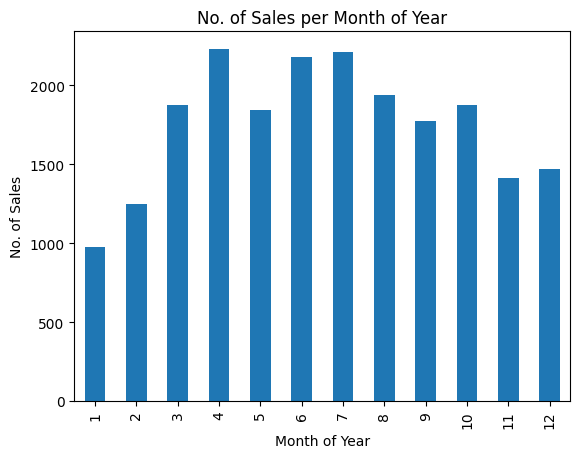

In [ ]:
houses[may_to_may_mask]["date"].dt.month.value_counts().sort_index().plot(kind="bar", ylabel="No. of Sales", xlabel="Month of Year", title="No. of Sales per Month of Year")

##### Count up the number of homesales by day of the week  


In [ ]:
# Recall, 0 = Monday, 6 = Sunday
houses["date"].dt.dayofweek.value_counts().sort_index()

0    4099
1    4715
2    4603
3    3994
4    3685
5     287
6     230
Name: date, dtype: int64

##### Create a line plot showing the total number of sales by week of the year number (1-52)  

In [ ]:
# How many unique weeks?
houses["date"].dt.isocalendar().week.nunique()

52

<Axes: title={'center': 'No. of Sales by Week of Year'}, xlabel='Week of the Year', ylabel='No. of Sales'>

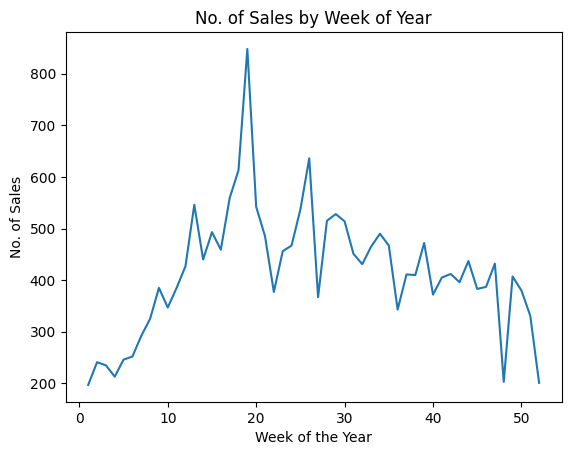

In [ ]:
houses["date"].dt.isocalendar().week.value_counts().sort_index().plot(kind="line", xlabel="Week of the Year", ylabel="No. of Sales", title="No. of Sales by Week of Year")

##### Create a bar plot showing the total number of sales that took place in December, January, and February

In [ ]:
# Getting total number of sales for each month:
houses["date"].dt.month.value_counts()

5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: date, dtype: int64

In [ ]:
# Getting total number of sales for Dec, Jan & Feb (months no. 12, 1 & 2)
houses["date"].dt.month.value_counts().loc[[12,1,2]]

12    1471
1      978
2     1250
Name: date, dtype: int64

<Axes: title={'center': 'No. of Sales for Dec, Jan & Feb'}, xlabel='Months', ylabel='No. of Sales'>

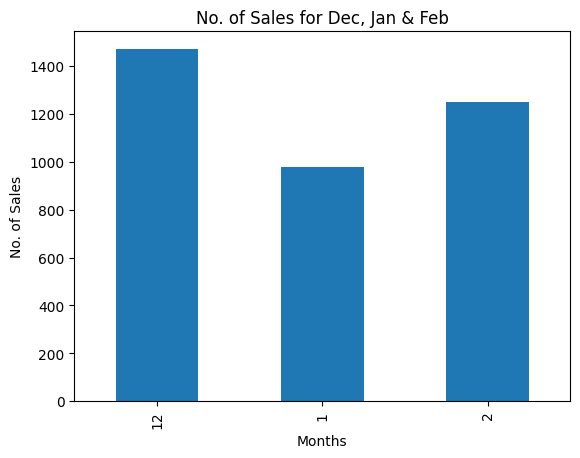

In [ ]:
# Creating a bar graph
houses["date"].dt.month.value_counts().loc[[12,1,2]].plot(kind="bar", ylabel="No. of Sales", xlabel="Months", title="No. of Sales for Dec, Jan & Feb")

##### Work with the homes sold between May 1st 2014 and May 1st 2015

In [ ]:
may_to_may_mask = houses["date"].between("May 01 2014", "May 01 2015", inclusive="both")

###### Within that year, find the waterfront homes that were sold

In [ ]:
houses[may_to_may_mask & (houses["waterfront"]==1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
230,8096000060,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1,4,...,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1,4,...,5,760,0,1936,0,98070,47.4683,-122.438,1230,14267
300,3225069065,2014-06-24,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,2025069140,2015-03-17,1898000.0,3,2.50,2830,4334,3.0,1,4,...,10,2830,0,2006,0,98074,47.6318,-122.071,2830,38211
20325,518500480,2014-08-11,3000000.0,3,3.50,4410,10756,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
20767,8043700105,2015-04-17,2300000.0,4,4.00,4360,8175,2.5,1,4,...,10,3940,420,2007,0,98008,47.5724,-122.104,2670,8525
21201,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1,4,...,11,2830,930,2014,0,98056,47.5285,-122.205,3560,5762


###### Which quarter of that year had the most waterfront home sales?  The least?

In [ ]:
# Most House Sales
houses[may_to_may_mask & (houses["waterfront"]==1)]["date"].dt.quarter.value_counts().sort_values(ascending=False)

# Most Waterfronts Sold: Quarter 2 = 48 houses
# Least Waterfronts Sold: Quarter 1 = 27 houses

2    48
4    43
3    42
1    27
Name: date, dtype: int64

###### Create a bar plot showing the number of waterfront home sales per quarter

<Axes: title={'center': 'No. of Waterfront Homes per Quarter'}, xlabel='Quarter', ylabel='No. of Waterfront Home Sales'>

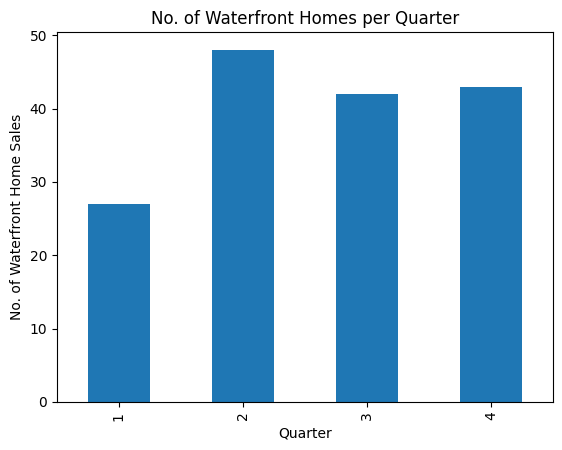

In [ ]:
houses[may_to_may_mask & (houses["waterfront"]==1)]["date"].dt.quarter.value_counts().sort_index().plot(kind="bar", ylabel="No. of Waterfront Home Sales", xlabel="Quarter", title="No. of Waterfront Homes per Quarter")